In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

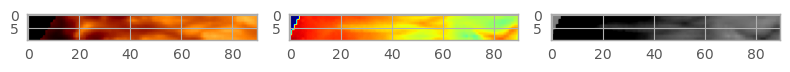

In [52]:
dc_rot = ndimage.rotate(data_conti, -33, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[111:121,30:,28], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[111:121,30:,28], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[111:121,30:,28], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

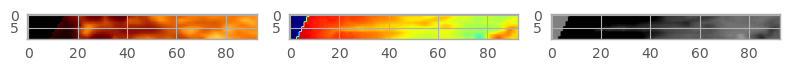

In [64]:
dc_rot = ndimage.rotate(data_conti, -33, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[110:120,27:,29], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[110:120,27:,29], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[110:120,27:,29], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

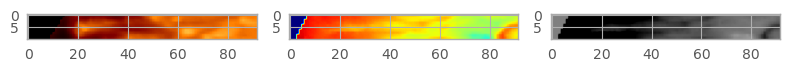

In [67]:
dc_rot = ndimage.rotate(data_conti, -33, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[109:119,28:,30], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[109:119,28:,30], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[109:119,28:,30], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

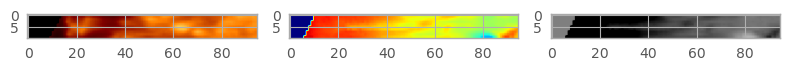

In [68]:
dc_rot = ndimage.rotate(data_conti, -30, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[108:118,25:,31], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[108:118,25:,31], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[108:118,25:,31], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

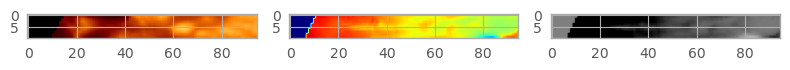

In [70]:
dc_rot = ndimage.rotate(data_conti, -30, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[107:117,25:,32], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[107:117,25:,32], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[107:117,25:,32], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

In [78]:
#continuum intensity #new update! you have to include each rotation when tracking or the values will be so weird
dc_rot = ndimage.rotate(data_conti, -30, reshape=False)
dc_rot[107:117,25:,32][5][20:60]

array([ 8473.93241549,  9098.83098012,  9764.06229057, 10351.78162734,
       10590.59574917, 10190.14642142,  9533.65675822,  8859.10864532,
        8275.80987766,  7957.54936622,  7712.27355559,  7455.76295015,
        7491.28849566,  7634.4594667 ,  7695.90767306,  7571.95648804,
        7555.03529544,  7684.2714642 ,  7601.82652103,  8108.49711258,
        7996.34793953,  7964.7034076 ,  8123.25784166,  8392.07317939,
        8656.34115391,  8754.12097191,  8783.8012916 ,  9103.82143706,
        9365.34279766,  9246.09802655,  9016.78743894,  9164.07269396,
        8939.87910153,  9093.87162845,  9401.68754199,  9644.31344349,
        9782.02712833,  9768.63168102, 10176.32558984, 10828.29277503])

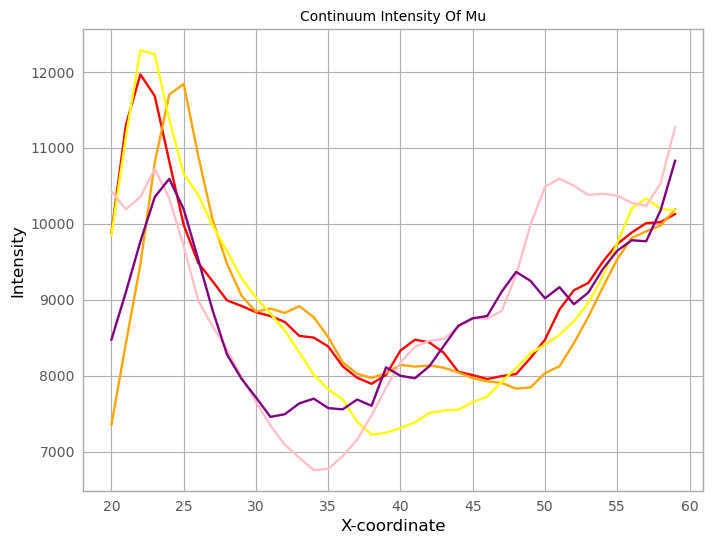

In [77]:
#vertical index [5]
dc_y0 = np.array([ 9878.12186567, 11299.45536646, 11965.12659649, 11679.88704937,
       10822.15664271,  9982.7487364 ,  9485.52471674,  9241.56168334,
        8989.50337779,  8916.57989948,  8833.88015181,  8784.38702489,
        8704.96047187,  8521.7305843 ,  8499.80677153,  8383.79262946,
        8121.98014586,  7971.38187941,  7891.45735535,  8009.6724521 ,
        8329.42859866,  8472.41002677,  8436.53772436,  8298.40779574,
        8049.93787362,  8006.07293056,  7954.5640895 ,  7992.51922164,
        8020.20539897,  8231.65798893,  8473.66921516,  8869.15452896,
        9123.36369884,  9220.39391275,  9498.27295305,  9732.18260267,
        9883.58606509, 10007.69670009, 10019.66168078, 10126.72276383])
dc_x0 = range(20,60)

#vertical index [5]
dc_y1 = np.array([ 7355.08736411,  8424.38025764,  9462.15879602, 10806.53993768,
       11700.03928781, 11840.47236206, 10897.70726954, 10052.3374449 ,
        9467.80114125,  9051.90087132,  8841.40232431,  8882.08329355,
        8824.95743768,  8914.75697726,  8767.2973169 ,  8506.5026698 ,
        8172.6363734 ,  8023.55452752,  7968.49528973,  8035.04447303,
        8141.18453276,  8117.93309378,  8132.57819336,  8103.27177573,
        8041.69769266,  7965.65940202,  7924.52973132,  7902.94614967,
        7828.0177135 ,  7844.70667673,  8032.55929381,  8122.28154423,
        8427.62394963,  8774.04483441,  9162.2357074 ,  9534.04351598,
        9812.26123358,  9899.22137454,  9977.66782643, 10187.71037564])
dc_x1 = range(20,60)

#vertical index [5]
dc_y2 = np.array([ 9856.73950339, 11144.15166442, 12285.44169448, 12228.45356098,
       11373.32269415, 10657.69845127, 10380.30182626,  9971.91813933,
        9639.88722441,  9284.29126674,  9023.75149661,  8817.34131296,
        8590.9772042 ,  8304.02323261,  8010.76309802,  7816.57000814,
        7686.30822538,  7393.93130663,  7219.58103483,  7247.58251293,
        7308.5187014 ,  7384.69578508,  7507.67290509,  7540.16098425,
        7550.81953847,  7650.63843189,  7722.12328129,  7918.59481377,
        8098.69862722,  8294.36340536,  8406.91627746,  8535.22316219,
        8714.72802636,  8959.36498273,  9303.15389466,  9747.47028607,
       10201.55701039, 10335.03424464, 10196.81590502, 10174.05526093])
dc_x2 = range(20,60)

#vertical index [5]
dc_y3 = np.array([10422.60627439, 10189.77406915, 10350.55116171, 10723.04725814,
       10331.57981833,  9704.53894405,  8989.28892177,  8647.58804803,
        8342.45008756,  7980.10153603,  7653.2064135 ,  7342.42801794,
        7089.16006698,  6916.83011496,  6755.16331309,  6770.20430581,
        6938.38343501,  7155.80850294,  7475.83045669,  7839.34969113,
        8174.59072481,  8378.75506834,  8456.8907422 ,  8482.43808566,
        8638.01354692,  8754.82447598,  8748.39342493,  8852.23215695,
        9322.71257473,  9989.33656148, 10485.50894883, 10592.7815727 ,
       10499.09128566, 10378.08415294, 10394.46434806, 10368.42490548,
       10274.63147837, 10233.75049698, 10533.48676916, 11268.32040649])
dc_x3 = range(20,60)

#vertical index[5]
dc_y4 = np.array([ 8473.93241549,  9098.83098012,  9764.06229057, 10351.78162734,
       10590.59574917, 10190.14642142,  9533.65675822,  8859.10864532,
        8275.80987766,  7957.54936622,  7712.27355559,  7455.76295015,
        7491.28849566,  7634.4594667 ,  7695.90767306,  7571.95648804,
        7555.03529544,  7684.2714642 ,  7601.82652103,  8108.49711258,
        7996.34793953,  7964.7034076 ,  8123.25784166,  8392.07317939,
        8656.34115391,  8754.12097191,  8783.8012916 ,  9103.82143706,
        9365.34279766,  9246.09802655,  9016.78743894,  9164.07269396,
        8939.87910153,  9093.87162845,  9401.68754199,  9644.31344349,
        9782.02712833,  9768.63168102, 10176.32558984, 10828.29277503])
dc_x4 = range(20,60)

plt.title("Continuum Intensity Of Mu")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
plt.plot(dc_x3,dc_y3, color="pink")
plt.plot(dc_x4,dc_y4, color="purple")

plt.show()

In [83]:
##magnetic inclinaton
mi_rot[107:117,25:,32][5][20:60]

array([147.7078947 , 147.55501523, 148.13505109, 148.1425022 ,
       144.66159585, 139.40558979, 135.21073085, 131.99633924,
       129.91638929, 128.00389774, 127.44685255, 125.7594184 ,
       127.18635215, 127.90401654, 125.30562704, 134.20189428,
       128.09328182, 120.15329449, 121.6959651 , 120.02741983,
       119.73126797, 119.1479083 , 120.67655769, 122.92589875,
       121.80488768, 116.60271401, 117.57925612, 114.92563799,
       112.23191698, 111.581954  , 112.62867281, 114.55462886,
       115.20276944, 118.52672334, 123.27423399, 124.98598945,
       124.61976378, 120.08099968, 116.21739781, 113.80725981])

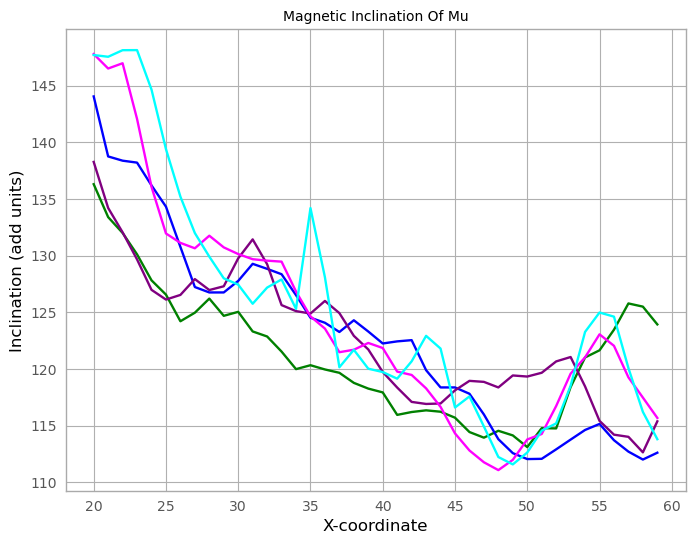

In [92]:
#vertical index [5]
mi_y0 = np.array([136.30916317, 133.40468256, 132.00734636, 130.12064188,
       127.82671175, 126.5658033 , 124.2144338 , 124.96928223,
       126.21366115, 124.69377444, 125.04545813, 123.31503428,
       122.87028682, 121.53629652, 119.98959278, 120.33416795,
       119.95960537, 119.66472546, 118.77723996, 118.27084385,
       117.93468921, 115.95183753, 116.20366794, 116.35319928,
       116.23029698, 115.70334232, 114.43762305, 113.94116046,
       114.54813034, 114.13986741, 113.10950443, 114.7783431 ,
       114.75890008, 118.40476318, 121.01838303, 121.6498133 ,
       123.46837876, 125.78605328, 125.50471681, 123.93562201])
mi_x0 = range(20,60)

#vertical index [5]
mi_y1 = np.array([144.05518957, 138.75966714, 138.38503192, 138.21355052,
       136.20264652, 134.32867862, 130.77388146, 127.23378605,
       126.7563186 , 126.75720561, 127.77584449, 129.28113867,
       128.83983142, 128.36437214, 126.5165493 , 124.52611452,
       124.08007656, 123.26730131, 124.30110632, 123.30808406,
       122.25365127, 122.43848777, 122.54728905, 119.89627786,
       118.3748061 , 118.37342085, 117.81627927, 115.98809082,
       113.8055593 , 112.57593558, 112.0517173 , 112.07363618,
       112.91027621, 113.76993955, 114.62070032, 115.15113104,
       113.71505769, 112.70880191, 112.01004572, 112.61410491])
mi_x1 = range(20,60)

#vertical index [5]
mi_y2 = np.array([138.27495901, 134.21269422, 132.06397314, 129.66940234,
       126.98645407, 126.12766495, 126.53865283, 127.935613  ,
       126.96912222, 127.30074893, 129.76984331, 131.43984817,
       129.24937419, 125.63904844, 125.10920154, 124.8947045 ,
       126.0063067 , 124.93294933, 122.92771363, 121.72404497,
       119.73860122, 118.36377724, 117.09690821, 116.9156811 ,
       116.95666813, 118.11599511, 118.95388717, 118.86454542,
       118.37373166, 119.4305372 , 119.33477415, 119.66845735,
       120.6700069 , 121.05799592, 118.46084757, 115.42272096,
       114.2054594 , 114.0144833 , 112.6456005 , 115.38343021])
mi_x2 = range(20,60)

#vertical index [5]
mi_y3 = np.array([147.79457733, 146.51831646, 146.9832578 , 142.06719047,
       136.07647431, 131.96117799, 131.1292979 , 130.65395017,
       131.76359131, 130.73361292, 130.14317884, 129.69086225,
       129.56153531, 129.47463127, 126.8335949 , 124.64593411,
       123.5651108 , 121.48297484, 121.70016906, 122.29974531,
       121.85200001, 119.77015364, 119.47615652, 118.29119621,
       116.65923738, 114.31792676, 112.81036874, 111.76920183,
       111.07770834, 111.98341411, 113.78309014, 114.26772612,
       116.7338685 , 119.58881168, 121.02993031, 123.06136526,
       122.04674476, 119.26252692, 117.47916077, 115.68336749])
mi_x3 = range(20,60)

#vertical index [5]
mi_y4 = np.array([147.7078947 , 147.55501523, 148.13505109, 148.1425022 ,
       144.66159585, 139.40558979, 135.21073085, 131.99633924,
       129.91638929, 128.00389774, 127.44685255, 125.7594184 ,
       127.18635215, 127.90401654, 125.30562704, 134.20189428,
       128.09328182, 120.15329449, 121.6959651 , 120.02741983,
       119.73126797, 119.1479083 , 120.67655769, 122.92589875,
       121.80488768, 116.60271401, 117.57925612, 114.92563799,
       112.23191698, 111.581954  , 112.62867281, 114.55462886,
       115.20276944, 118.52672334, 123.27423399, 124.98598945,
       124.61976378, 120.08099968, 116.21739781, 113.80725981])
mi_x4 = range(20,60)

plt.title("Magnetic Inclination Of Mu")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
plt.plot(mi_x3,mi_y3, color="magenta")
plt.plot(mi_x4,mi_y4, color="cyan")

plt.show()

In [89]:
#Bz plots
bz_rot[107:117,25:,32][5][20:60]

array([-1359.6176815 , -1323.17407071, -1303.18660192, -1284.49396852,
       -1097.32163299, -1011.42542418,  -909.06214089,  -841.69852718,
        -771.52780938,  -790.87150434,  -819.77559112,  -804.86770873,
        -869.41750711,  -935.64246462,  -869.16688801,  -963.84061779,
        -863.26141365,  -752.82002794,  -760.23503025,  -741.92822904,
        -735.77372451,  -727.2164277 ,  -773.07309219,  -845.03830127,
        -799.70411791,  -629.51047131,  -653.18127318,  -589.21174869,
        -505.85625059,  -472.89542021,  -489.89606527,  -511.64118453,
        -498.52137579,  -531.50730414,  -613.69111858,  -671.73340433,
        -676.72173201,  -539.60785521,  -422.04828334,  -361.68538955])

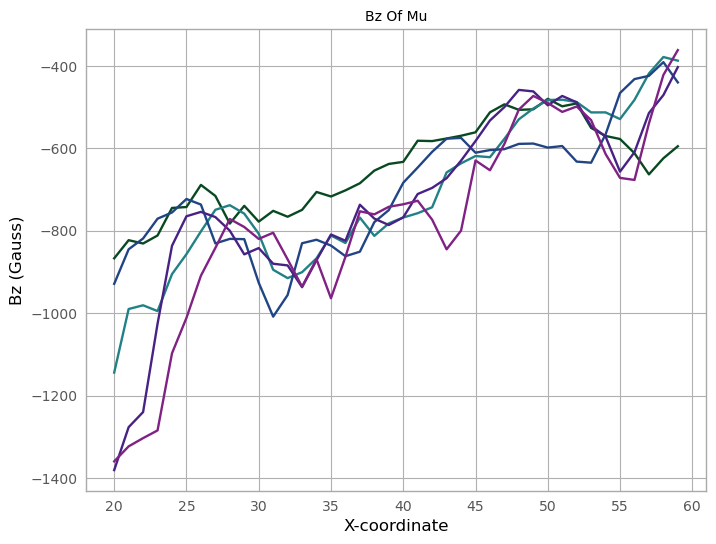

In [91]:
#vertical index [5]
bz_y0 = np.array([-866.91040267, -822.89641619, -830.94054133, -811.5225496 ,
       -744.67190302, -742.42912933, -688.80402494, -715.46445185,
       -782.59707931, -739.50724744, -777.85146339, -751.72449207,
       -765.99227797, -749.28395427, -705.9019734 , -716.8893219 ,
       -702.01918861, -684.73426768, -654.06912985, -637.90285982,
       -632.84788363, -581.56384305, -582.4489556 , -576.18324114,
       -569.50072676, -561.13058401, -512.64691798, -493.25781402,
       -506.5997432 , -505.36911884, -479.95684609, -498.05591278,
       -491.08324464, -550.46678757, -570.00383656, -577.38427219,
       -611.88373033, -663.15963967, -624.18517521, -594.95967603])
bz_x0 = range(20,60)

#vertical index [5]
bz_y1 = np.array([-1144.16046488,  -989.92680847,  -980.87590769,  -994.90432834,
        -905.24543875,  -856.81692403,  -801.62327882,  -749.17825445,
        -737.9920154 ,  -758.47285958,  -807.14814185,  -894.66904025,
        -914.93793377,  -900.48789893,  -866.89866996,  -811.44265312,
        -829.72023949,  -768.13247561,  -812.38619239,  -782.12174341,
        -767.91198209,  -757.45104284,  -743.0149363 ,  -658.52201169,
        -636.47690477,  -618.7061957 ,  -621.48863248,  -577.00412794,
        -529.58103961,  -503.32445882,  -482.79655513,  -482.02922326,
        -487.62544794,  -512.85908052,  -512.78853607,  -528.97831769,
        -482.54214781,  -418.36677487,  -378.47357981,  -387.27886895])
bz_x1 = range(20,60)

#vertical index [5]
bz_y2 = np.array([ -928.8449695 ,  -844.99307159,  -818.7266495 ,  -770.71670701,
        -755.68315528,  -722.94695028,  -736.42185254,  -830.78549524,
        -819.72811065,  -820.39912647,  -926.10842406, -1008.36306048,
        -955.96141791,  -830.29104645,  -821.82718054,  -835.96807074,
        -861.70442178,  -850.86708717,  -779.04037183,  -749.88628904,
        -683.4819238 ,  -646.60605336,  -608.54718248,  -576.57052585,
        -574.76488415,  -610.5975417 ,  -604.25655381,  -602.01354304,
        -589.23377018,  -588.4278298 ,  -598.2323207 ,  -594.49292876,
        -632.23230908,  -634.85518161,  -566.08142296,  -465.71801261,
        -431.9961782 ,  -424.10733485,  -390.86608421,  -440.06432458])
bz_x2 = range(20,60)

#vertical index [5]
bz_y3 = np.array([-1380.79987663, -1276.59076238, -1239.92293682, -1025.74637288,
        -836.4810128 ,  -764.85840013,  -754.23144539,  -766.78223525,
        -799.8554804 ,  -857.26382081,  -842.03371803,  -880.06263173,
        -884.10519366,  -936.92216811,  -871.51383876,  -809.08392695,
        -824.24759799,  -736.83411956,  -770.4985339 ,  -786.03877348,
        -767.515163  ,  -710.89328802,  -696.03803296,  -672.55080711,
        -629.85111956,  -582.39873299,  -532.45394142,  -499.88944622,
        -458.30408004,  -461.86691091,  -495.62777599,  -472.95645338,
        -488.3461978 ,  -545.59797933,  -571.492337  ,  -656.59632558,
        -609.38333507,  -514.39013093,  -470.89339039,  -402.85988642])
bz_x3 = range(20,60)
                  
#vertical index [5]
bz_y4 = np.array([-1359.6176815 , -1323.17407071, -1303.18660192, -1284.49396852,
       -1097.32163299, -1011.42542418,  -909.06214089,  -841.69852718,
        -771.52780938,  -790.87150434,  -819.77559112,  -804.86770873,
        -869.41750711,  -935.64246462,  -869.16688801,  -963.84061779,
        -863.26141365,  -752.82002794,  -760.23503025,  -741.92822904,
        -735.77372451,  -727.2164277 ,  -773.07309219,  -845.03830127,
        -799.70411791,  -629.51047131,  -653.18127318,  -589.21174869,
        -505.85625059,  -472.89542021,  -489.89606527,  -511.64118453,
        -498.52137579,  -531.50730414,  -613.69111858,  -671.73340433,
        -676.72173201,  -539.60785521,  -422.04828334,  -361.68538955])
bz_x4 = range(20,60)
                  
plt.title("Bz Of Mu")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="#094922")
plt.plot(bz_x1,bz_y1, color="#218184")
plt.plot(bz_x2,bz_y2, color="#214584")
plt.plot(bz_x3,bz_y3, color="#482184")
plt.plot(bz_x4,bz_y4, color="#802184")

plt.show()